In [1]:
import osiris_utils as ou
import numpy as np
from pathlib import Path
from tqdm import tqdm
import h5py
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:

path_init_field_advance = "/home/exxxx5/Tese/Decks/ComparePushers/studyAcceleration/init_field_advance/init_field_advance.in"
sim_init_field_advance = ou.Simulation(path_init_field_advance)

path_init_field_fixed = "/home/exxxx5/Tese/Decks/ComparePushers/studyAcceleration/init_field_fixed/init_field_fixed.in"
sim_init_field_fixed = ou.Simulation(path_init_field_fixed)

path_full_sim = "/home/exxxx5/Tese/Decks/ComparePushers/studyAcceleration/full_sim/full_sim.in"
sim_full_sim = ou.Simulation(path_full_sim)


In [3]:
def plot_hist(track, t=-1, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    
    label = ("$t = {:.2f}$".format(track["t"][0, t]) + "$[{}]$".format(track.units["t"]))
    ax.hist(track["p3"][:,t], bins=50, label=label)
    ax.set_xlabel("${}$".format(track.labels["p3"]) + "$[{}]$".format(track.units["p3"]))

    plt.legend()

    return fig, ax


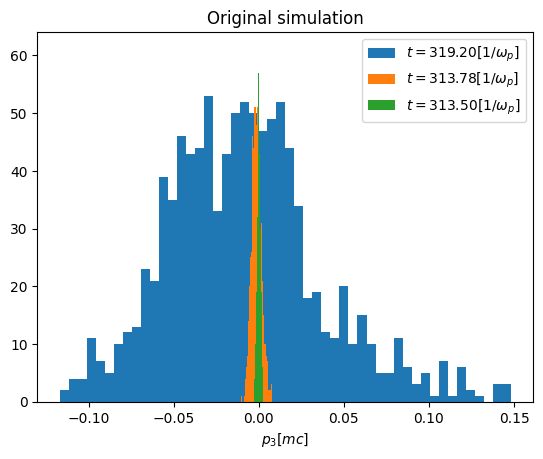

In [4]:
fig, ax = plot_hist(sim_full_sim["test_electrons"]["tracks"], t=-1)
fig, ax = plot_hist(sim_full_sim["test_electrons"]["tracks"], t=-20, fig=fig, ax=ax)
fig, ax = plot_hist(sim_full_sim["test_electrons"]["tracks"], t=-21, fig=fig, ax=ax)
ax.set_title("Original simulation")
plt.show()


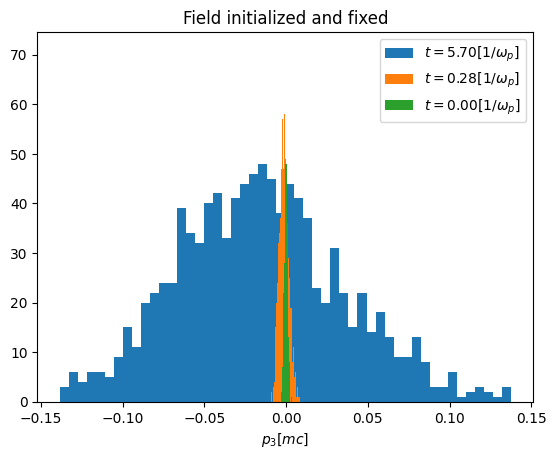

In [5]:
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=20)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=1, fig=fig, ax=ax)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=0, fig=fig, ax=ax)
ax.set_title("Field initialized and fixed")
plt.show()

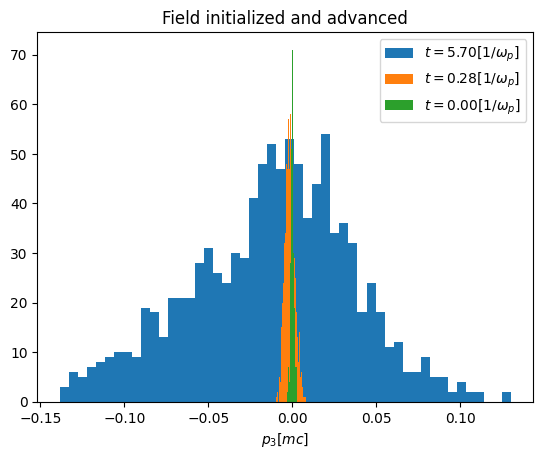

In [6]:
fig, ax = plot_hist(sim_init_field_advance["test_electrons"]["tracks"], t=20)
fig, ax = plot_hist(sim_init_field_advance["test_electrons"]["tracks"], t=1, fig=fig, ax=ax)
fig, ax = plot_hist(sim_init_field_advance["test_electrons"]["tracks"], t=0, fig=fig, ax=ax)
ax.set_title("Field initialized and advanced")
plt.show()

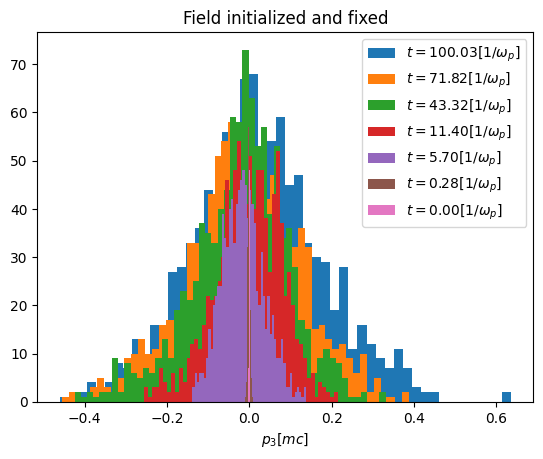

In [7]:

fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=-1)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=-100, fig=fig, ax=ax)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=-200, fig=fig, ax=ax)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=40, fig=fig, ax=ax)

fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=20, fig=fig, ax=ax)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=1, fig=fig, ax=ax)
fig, ax = plot_hist(sim_init_field_fixed["test_electrons"]["tracks"], t=0, fig=fig, ax=ax)
ax.set_title("Field initialized and fixed")
plt.show()

